In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [3]:
data = pd.read_csv(r'D:\MY DATA\DATA\DSA\titanic_dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [10]:
data = pd.read_csv(r'D:\MY DATA\DATA\DSA\titanic_dataset.csv', index_col = 'PassengerId' )

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [15]:
data.shape

(891, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Fill in all the missing values present in all the columns in the dataset

In [26]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

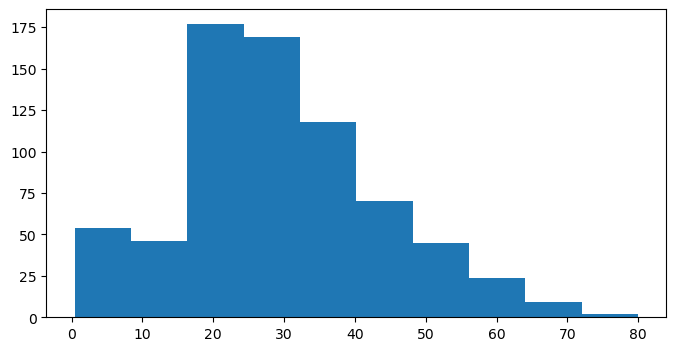

In [42]:
plt.figure(figsize=(8,4))
plt.hist(data['Age'])
plt.show()

In [44]:
# Normally distributed, replace with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [46]:
data['Age'].isna().sum()

0

In [54]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [56]:
data['Cabin'].isna().sum()

0

In [58]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [64]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [68]:
data['Embarked'].isna().sum()

0

In [70]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

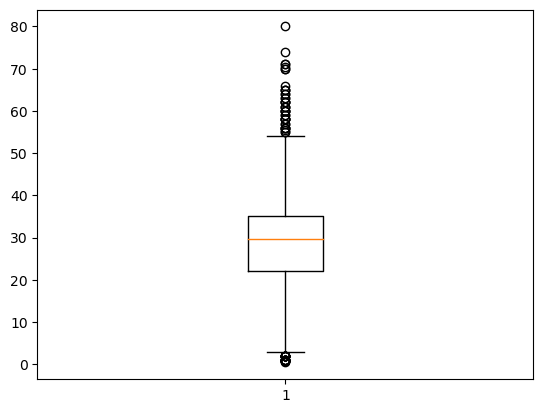

In [73]:
plt.boxplot(data['Age'])
plt.show()

In [75]:
Q1 = np.percentile(data['Age'], 25)
Q1

22.0

In [77]:
Q2 = np.percentile(data['Age'], 50)
Q2

29.69911764705882

In [79]:
Q3 = np.percentile(data['Age'], 75)
Q3

35.0

In [81]:
IQR = Q3 - Q1
IQR

13.0

In [83]:
age_lower_limit = Q1 - 1.5*IQR
age_upper_limit = Q3 + 1.5*IQR

In [85]:
age_lower_limit

2.5

In [87]:
age_upper_limit

54.5

In [95]:
age_upper_array = np.where(data['Age'] >= age_upper_limit)[0]
age_lower_array = np.where(data['Age'] <= age_lower_limit)[0]

In [97]:
age_upper_array

array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
       268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
       555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
       829, 851, 879], dtype=int64)

In [99]:
age_lower_array

array([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
       469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831], dtype=int64)

In [101]:
#replace outliers with upper limit and lower limit values
data['Age'] = np.where(data['Age']>age_upper_limit,age_upper_limit,data['Age'])
data['Age'] = np.where(data['Age']<age_lower_limit,age_lower_limit,data['Age'])


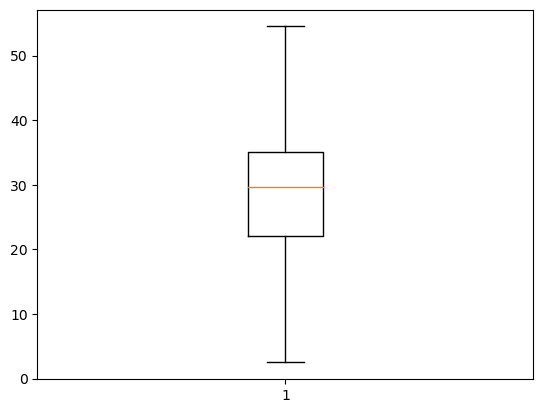

In [103]:
plt.boxplot(data['Age'])
plt.show()

In [105]:
data.shape

(891, 11)

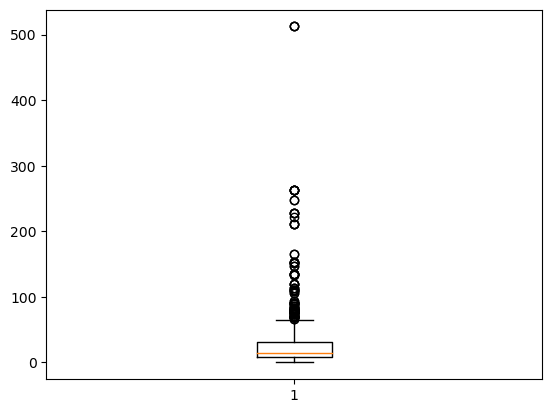

In [107]:
plt.boxplot(data['Fare'])
plt.show()

In [109]:
Q1 = np.percentile(data['Fare'], 25)
Q1

7.9104

In [111]:
Q2 = np.percentile(data['Fare'], 50)
Q2

14.4542

In [115]:
Q3 = np.percentile(data['Fare'], 75)
Q3

31.0

In [117]:
IQR = Q3 - Q1
IQR

23.0896

In [119]:
fare_lower_limit = Q1 - 1.5*IQR
fare_upper_limit = Q3 + 1.5*IQR

In [121]:
fare_lower_limit

-26.724

In [123]:
fare_upper_limit

65.6344

In [125]:
fare_upper_array = np.where(data['Fare'] >= fare_upper_limit)[0]
fare_lower_array = np.where(data['Fare'] <= fare_lower_limit)[0]

In [127]:
fare_upper_array

array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64)

In [129]:
fare_lower_array

array([], dtype=int64)

In [133]:
#capping
data['Fare'] = np.where(data['Fare']>fare_upper_limit,fare_upper_limit,data['Fare'])

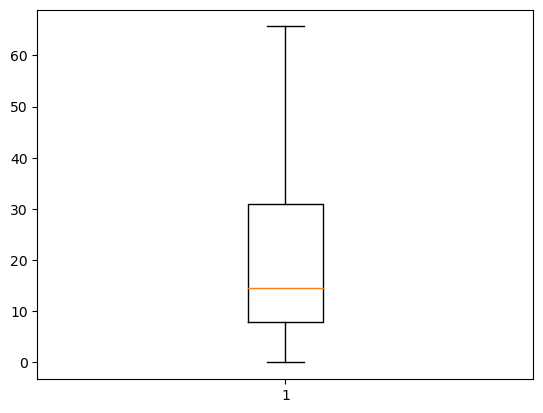

In [135]:
plt.boxplot(data['Fare'])
plt.show()

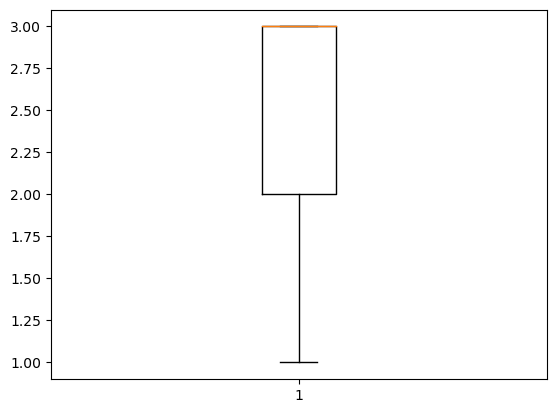

In [155]:
plt.boxplot(data['Pclass'])
plt.show()

In [ ]:
#No outliers in Pclass

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [158]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


In [160]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [162]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C23 C25 C27,S
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C23 C25 C27,S


In [164]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [166]:
x1 = x.drop(['Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'], axis = 1)

In [168]:
x1

,Pclass,Age,Fare
PassengerId,,,
1,3,22.000000,7.2500
2,1,38.000000,65.6344
3,3,26.000000,7.9250
4,1,35.000000,53.1000
5,3,35.000000,8.0500
...,...,...,...
887,2,27.000000,13.0000
888,1,19.000000,30.0000
889,3,29.699118,23.4500


In [170]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
x1 = min_max.fit_transform(x1)

In [172]:
type(x1)

numpy.ndarray

In [174]:
x1 = pd.DataFrame(x1)

In [176]:
type(x1)

pandas.core.frame.DataFrame

In [178]:
x1.describe()

,0,1,2
count,891.000000,891.000000,891.000000
mean,0.654321,0.516862,0.366375
std,0.418036,0.231962,0.312056
min,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.120522
50%,1.000000,0.523060,0.220223
75%,1.000000,0.625000,0.472313
max,1.000000,1.000000,1.000000


In [180]:
x.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [182]:
x = x.drop(['Pclass','Age','Fare'], axis = 1)

In [184]:
x = pd.concat([x,x1], axis = 1)

In [186]:
x.head()

,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,0,1,2
1,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,C23 C25 C27,S,0.0,0.682692,1.000000
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,C85,C,1.0,0.451923,0.120745
3,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,C23 C25 C27,S,0.0,0.625000,0.809027
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,C123,S,1.0,0.625000,0.122649
5,"Allen, Mr. William Henry",male,0.0,0.0,373450,C23 C25 C27,S,1.0,0.523060,0.128870


In [194]:
x.columns = ['Name', 'Sex','SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked','Pclass','Age','Fare']

In [196]:
x.head()

,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Pclass,Age,Fare
1,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,C23 C25 C27,S,0.0,0.682692,1.000000
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,C85,C,1.0,0.451923,0.120745
3,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,C23 C25 C27,S,0.0,0.625000,0.809027
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,C123,S,1.0,0.625000,0.122649
5,"Allen, Mr. William Henry",male,0.0,0.0,373450,C23 C25 C27,S,1.0,0.523060,0.128870
